In [9]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
from keras.src.models import Sequential
from sklearn.metrics import f1_score


# CNN #
### Load Data

In [10]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_val = x_val.astype("float32") / 255

### Experiment
#### Number of Convolution

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3324 - loss: 1.8838 - val_accuracy: 0.4935 - val_loss: 1.4679
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5130 - loss: 1.4059 - val_accuracy: 0.5460 - val_loss: 1.3317
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5649 - loss: 1.2662 - val_accuracy: 0.5648 - val_loss: 1.2651
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5952 - loss: 1.1793 - val_accuracy: 0.5750 - val_loss: 1.2243
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6090 - loss: 1.1379 - val_accuracy: 0.5990 - val_loss: 1.1782
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.3400 - loss: 1.8256 - val_accuracy: 0.4793 - val_loss: 1.4442
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.5278 - loss: 1.3325 - val_accuracy: 0.5562 - val_loss: 1.2724
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accura

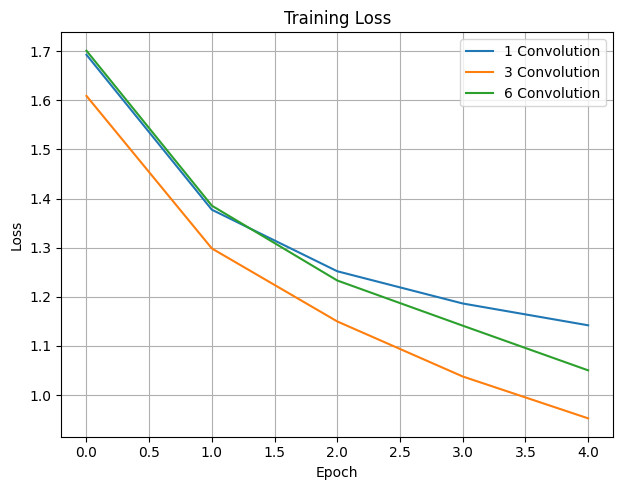

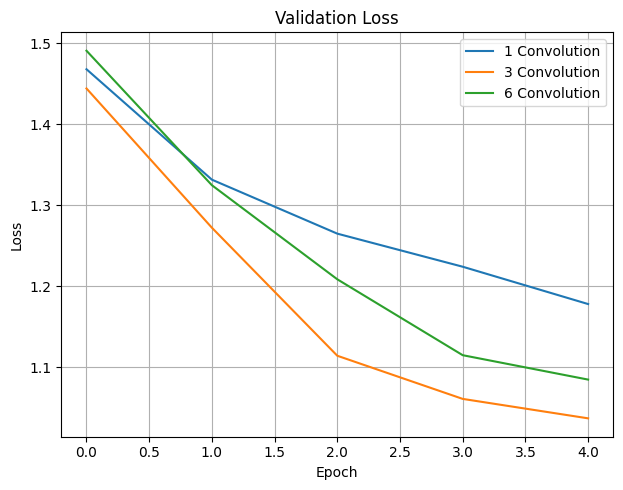

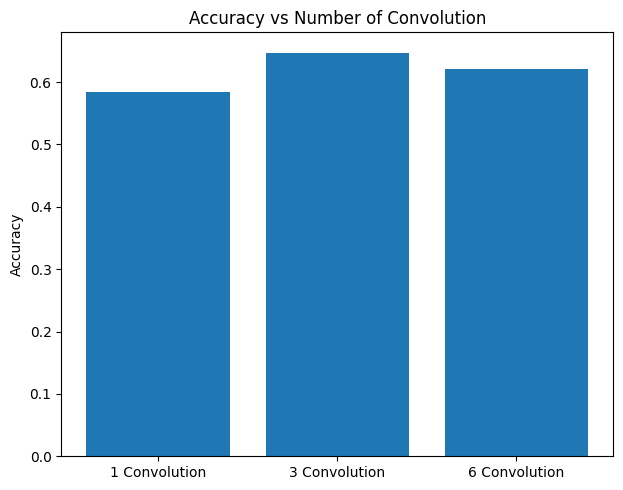

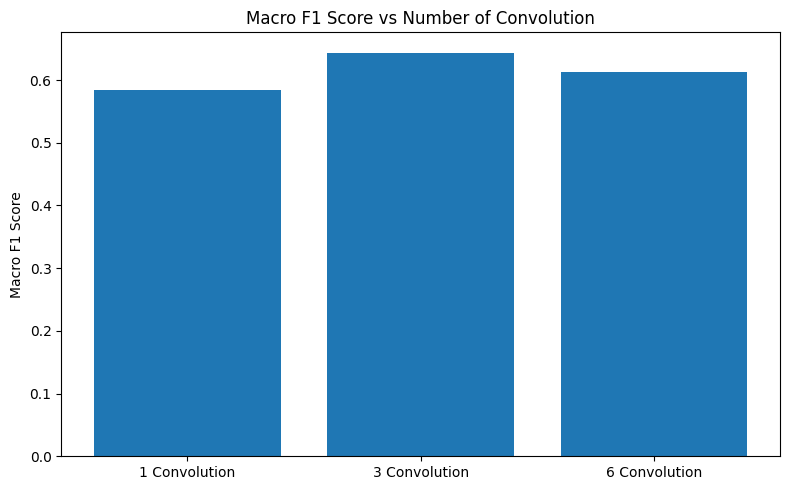

In [11]:
batch_size = 128
epochs = 5

conv = {
    "1 Convolution" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ], 
    "3 Convolution" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ],
    "6 Convolution" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")

    ]
}



accuracy = []
train_loss = {}
val_loss = {}

f1_scores = []

for name, data in conv.items():
    model = keras.Sequential(data)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
    train_loss[name] = history.history["loss"]
    val_loss[name] = history.history["val_loss"]

    score = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(score[1])  

    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    f1 = f1_score(y_test.flatten(), y_pred_classes, average='macro')
    f1_scores.append(f1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in train_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in val_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

names = [name for name in conv.keys()]

plt.bar(names, accuracy)
plt.title("Accuracy vs Number of Convolution")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(names, f1_scores)
plt.title("Macro F1 Score vs Number of Convolution")
plt.ylabel("Macro F1 Score")
plt.tight_layout()
plt.show()


### Number of Filter

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3389 - loss: 1.8563 - val_accuracy: 0.4934 - val_loss: 1.4520
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5185 - loss: 1.3857 - val_accuracy: 0.5350 - val_loss: 1.3262
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5648 - loss: 1.2566 - val_accuracy: 0.5668 - val_loss: 1.2560
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5941 - loss: 1.1870 - val_accuracy: 0.5599 - val_loss: 1.2466
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6022 - loss: 1.1434 - val_accuracy: 0.5872 - val_loss: 1.1886
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.3477 - loss: 1.8250 - val_accuracy: 0.5162 - val_loss: 1.4012
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5398 - loss: 1.3295 - val_accuracy: 0.5618 - val_loss: 1.2588
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 

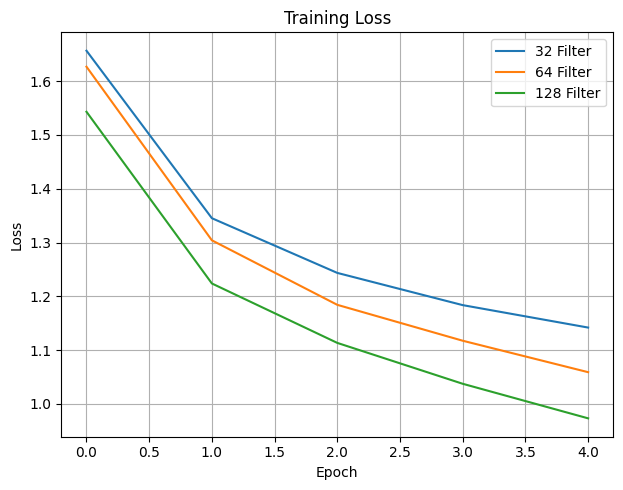

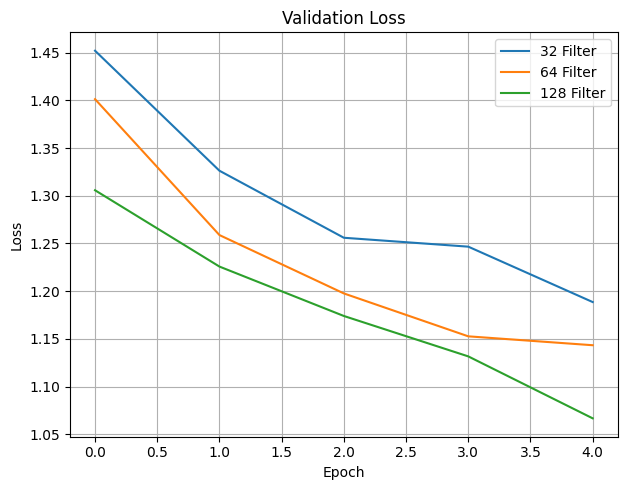

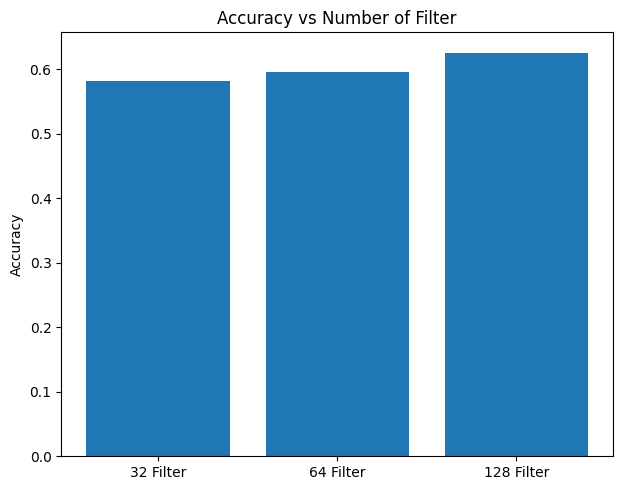

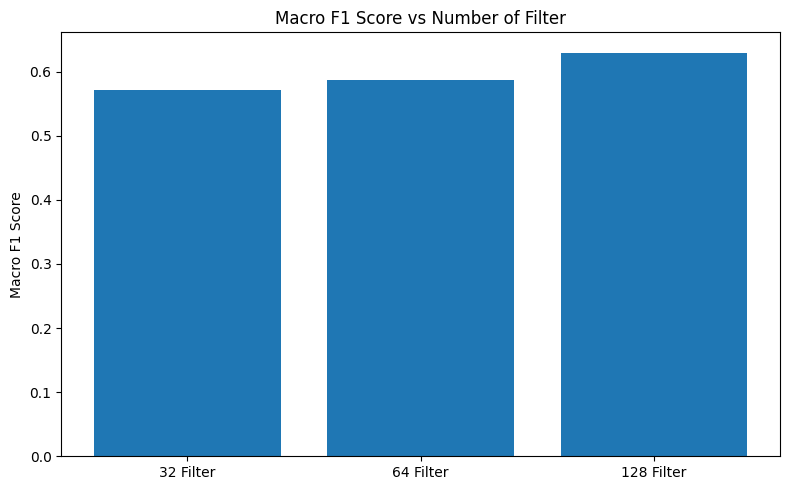

In [12]:


num_of_fiter = {
    "32 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ],
    "64 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ],
    "128 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ]
}

accuracy = []
train_loss = {}
val_loss = {}
f1_scores = []

for name, data in num_of_fiter.items():
    model = keras.Sequential(data)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
    train_loss[name] = history.history["loss"]
    val_loss[name] = history.history["val_loss"]
    
    score = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(score[1])  
    
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    f1 = f1_score(y_test.flatten(), y_pred_classes, average='macro')
    f1_scores.append(f1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in train_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in val_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

names = [name for name in num_of_fiter.keys()]

plt.bar(names, accuracy)
plt.title("Accuracy vs Number of Filter")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(names, f1_scores)
plt.title("Macro F1 Score vs Number of Filter")
plt.ylabel("Macro F1 Score")
plt.tight_layout()
plt.show()


### Size of Filter

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3418 - loss: 1.8518 - val_accuracy: 0.4875 - val_loss: 1.4796
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5166 - loss: 1.3902 - val_accuracy: 0.5437 - val_loss: 1.3145
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5640 - loss: 1.2480 - val_accuracy: 0.5665 - val_loss: 1.2551
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5925 - loss: 1.1734 - val_accuracy: 0.5793 - val_loss: 1.2114
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6075 - loss: 1.1308 - val_accuracy: 0.5865 - val_loss: 1.1905
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3222 - loss: 1.8897 - val_accuracy: 0.4634 - val_loss: 1.5419
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4768 - loss: 1.4806 - val_accuracy: 0.5011 - val_loss: 1.4344
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy:

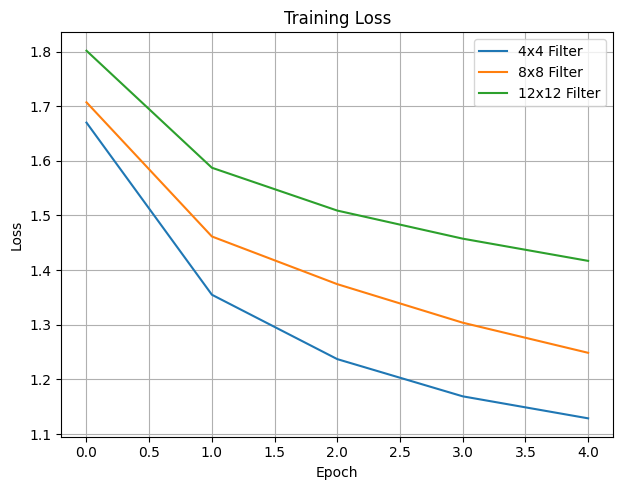

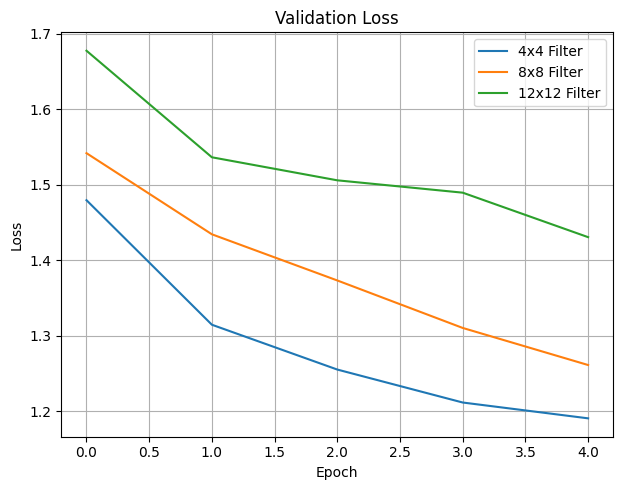

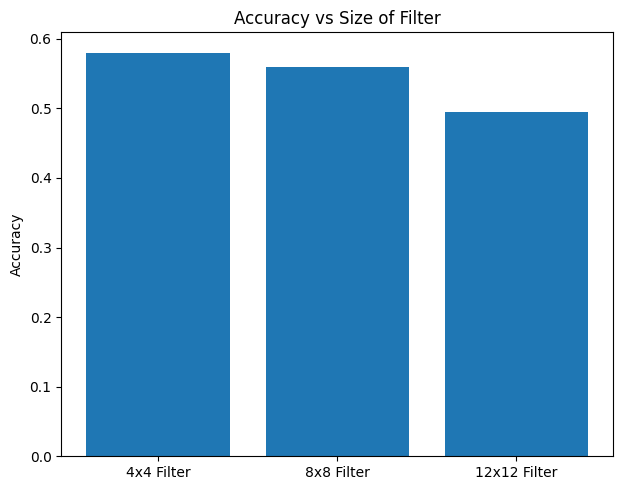

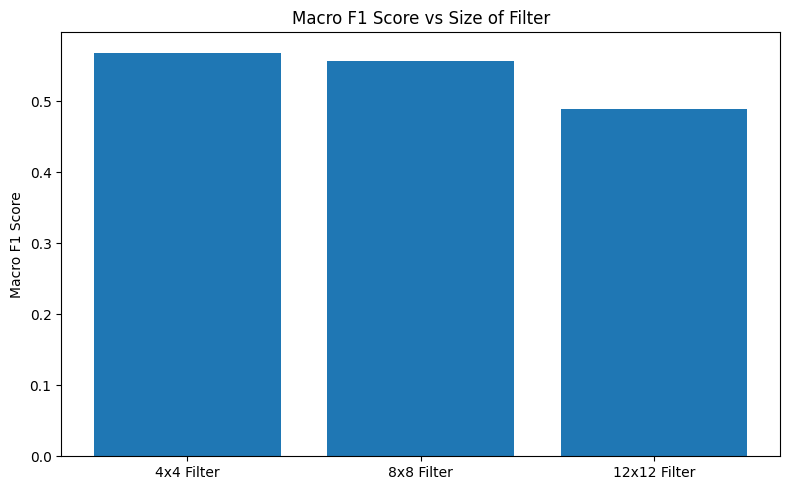

In [13]:
size_of_fiter = {
    "4x4 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ],
    "8x8 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(8, 8), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ],
    "12x12 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(12, 12), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ]
}

accuracy = []
train_loss = {}
val_loss = {}
f1_scores = []

for name, data in size_of_fiter.items():
    model = keras.Sequential(data)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
    train_loss[name] = history.history["loss"]
    val_loss[name] = history.history["val_loss"]
    
    score = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(score[1]) 
    
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    f1 = f1_score(y_test.flatten(), y_pred_classes, average='macro')
    f1_scores.append(f1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in train_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in val_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

names = [name for name in size_of_fiter.keys()]

plt.bar(names, accuracy)
plt.title("Accuracy vs Size of Filter")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(names, f1_scores)
plt.title("Macro F1 Score vs Size of Filter")
plt.ylabel("Macro F1 Score")
plt.tight_layout()
plt.show()

### Pooling

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3370 - loss: 1.8725 - val_accuracy: 0.5012 - val_loss: 1.4443
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5151 - loss: 1.3856 - val_accuracy: 0.5322 - val_loss: 1.3308
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5661 - loss: 1.2522 - val_accuracy: 0.5651 - val_loss: 1.2598
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5843 - loss: 1.2013 - val_accuracy: 0.5674 - val_loss: 1.2456
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6047 - loss: 1.1430 - val_accuracy: 0.5900 - val_loss: 1.1974
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3359 - loss: 1.8802 - val_accuracy: 0.4780 - val_loss: 1.5028
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5049 - loss: 1.4315 - val_accuracy: 0.5177 - val_loss: 1.3869
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.

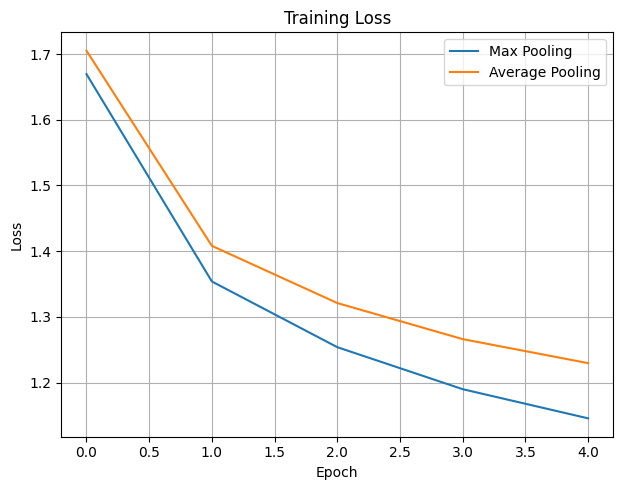

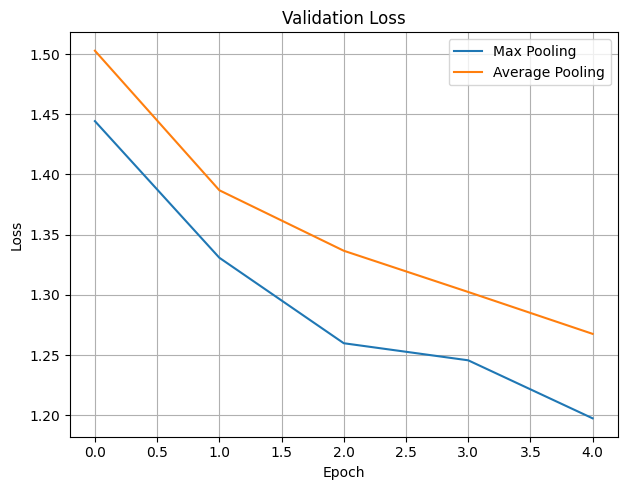

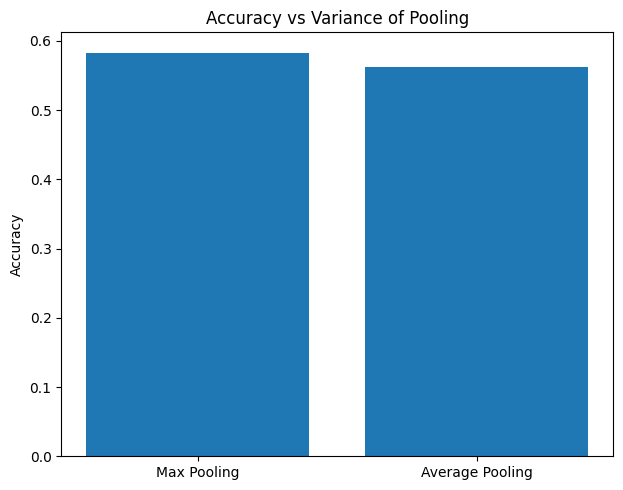

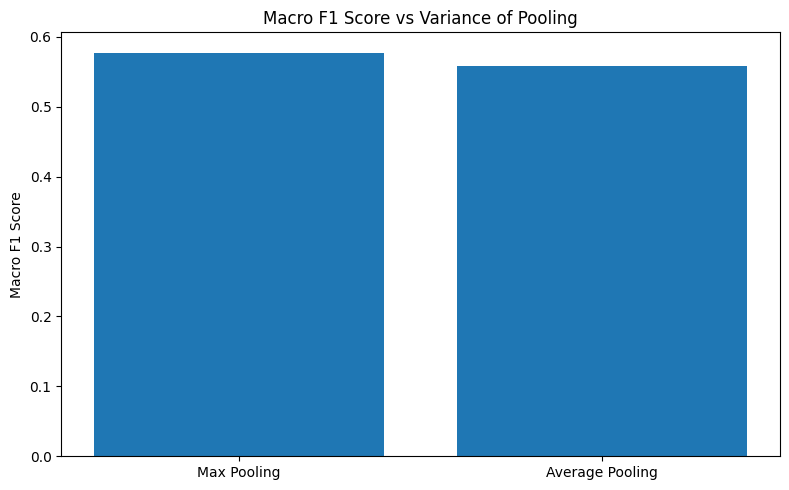

In [14]:
variance_of_pooling = {
    "Max Pooling" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ],
    "Average Pooling" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ]
}

accuracy = []
train_loss = {}
val_loss = {}
f1_scores = []

for name, data in variance_of_pooling.items():
    model = keras.Sequential(data)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
    train_loss[name] = history.history["loss"]
    val_loss[name] = history.history["val_loss"]
    
    score = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(score[1])  
    
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    f1 = f1_score(y_test.flatten(), y_pred_classes, average='macro')
    f1_scores.append(f1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in train_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in val_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

names = [name for name in variance_of_pooling.keys()]

plt.bar(names, accuracy)
plt.title("Accuracy vs Variance of Pooling")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
plt.bar(names, f1_scores)
plt.title("Macro F1 Score vs Variance of Pooling")
plt.ylabel("Macro F1 Score")
plt.tight_layout()
plt.show()

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3204 - loss: 1.9070 - val_accuracy: 0.4780 - val_loss: 1.4996
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5002 - loss: 1.4421 - val_accuracy: 0.5293 - val_loss: 1.3559
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5424 - loss: 1.3073 - val_accuracy: 0.5508 - val_loss: 1.2968
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5761 - loss: 1.2209 - val_accuracy: 0.5585 - val_loss: 1.2609
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5977 - loss: 1.1619 - val_accuracy: 0.5677 - val_loss: 1.2340
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


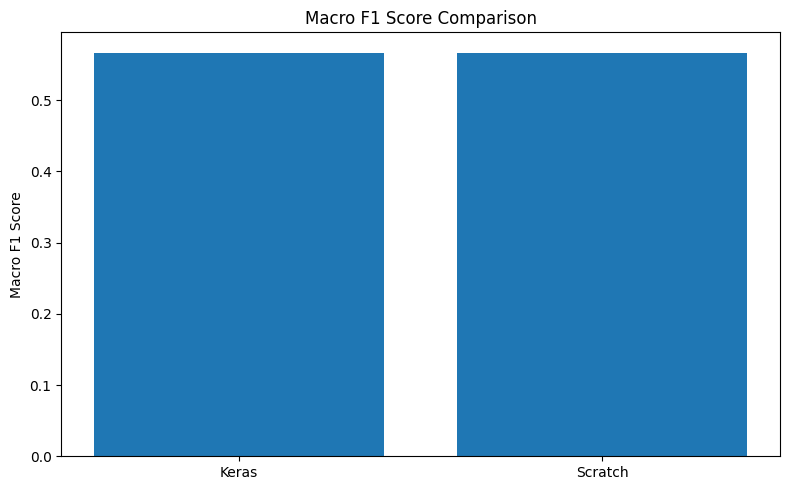

In [15]:
from src.cnn import CNNFromScratch

model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", name="conv2d"),
    layers.MaxPooling2D(pool_size=(2, 2), name="maxpooling2d"),
    layers.Flatten(name="flatten"),
    layers.Dense(num_classes, activation="softmax", name="dense")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Save model weights
def save_model_for_cnn(model, save_path="../model/cnn.pkl"):
    weights_dict = {}
    for layer in model.layers:
        if layer.weights:
            layer_name = layer.name
            if isinstance(layer, (layers.Conv2D, layers.Dense)):
                weights_dict[f"{layer_name}/kernel"] = layer.weights[0].numpy()
                if len(layer.weights) > 1:
                    weights_dict[f"{layer_name}/bias"] = layer.weights[1].numpy()
    
    with open(save_path, 'wb') as f:
        pickle.dump(weights_dict, f)

save_model_for_cnn(model)

# Initialize and configure CNNFromScratch make layers same as Keras model
CNNCustom = CNNFromScratch("../model/cnn.pkl")
CNNCustom.add_layer("conv2d", name="conv2d", filters=32, kernel_size=(3, 3), activation="relu")
CNNCustom.add_layer("maxpooling2d", name="maxpooling2d", pool_size=(2, 2))
CNNCustom.add_layer("flatten", name="flatten")
CNNCustom.add_layer("dense", name="dense", units=num_classes, activation="softmax")


keras_pred = np.argmax(model.predict(x_test), axis=1)
keras_f1 = f1_score(y_test, keras_pred, average='macro')
scratch_pred = np.argmax(CNNCustom.predict(x_test), axis=1)
scratch_f1 = f1_score(y_test, scratch_pred, average='macro')

plt.figure(figsize=(8, 5))
plt.bar(["Keras", "Scratch"], [keras_f1, scratch_f1])
plt.title("Macro F1 Score Comparison")
plt.ylabel("Macro F1 Score")
plt.tight_layout()
plt.show()